In [7]:
import pandas as pd
col = ['X','Y','target']
df = pd.read_csv('C:\\Users\\sravy\\Desktop\\ml lab\\Student-University(For Logistic Regression Program).csv',names=col)
df.head()

,X,Y,target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Accuracy: 0.85


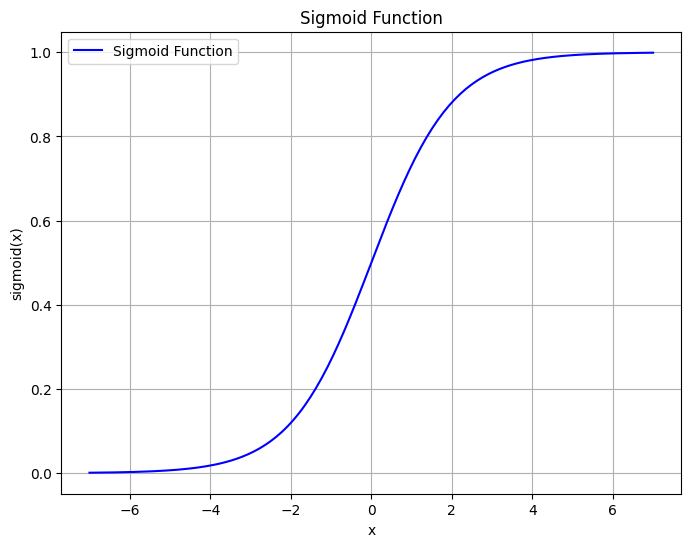

Regression Parameters using Gradient Descent: [1.25000549 1.16665579]


In [8]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Assuming 'X' and 'Y' are the feature and target columns
X = df[['X', 'Y']].values
Y = df['target'].values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
model.fit(X_train, Y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == Y_test).mean()
print(f"Accuracy: {accuracy}")

# Gradient Descent for Logistic Regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-7, 7, 200)
# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', color='b')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.legend()
plt.show()

# Initialize parameters for gradient descent
theta = np.zeros(X_train.shape[1]) # Initialize parameters to zeros
alpha = 0.01 # Learning rate
num_iterations = 1000

# Perform gradient descent
for _ in range(num_iterations):
    z = np.dot(X_train, theta)
    h = sigmoid(z)
    error = h - Y_train
    gradient = np.dot(X_train.T, error) / len(Y_train)
    theta -= alpha * gradient

# Print the computed regression parameters
print(f'Regression Parameters using Gradient Descent: {theta}')